

**Machine Learning I (Semester 1 2025)**
# Tutorial Session 8: Support Vector Machines

*N. Hernitschek*



This Jupyter notebook is the on the usage of Support Vector Machines, a type of classification method.

It is based on code from the textbook

*An Introduction to Statistical Learning: with Applications in Python.*
James Witten, Hastie, Tibshirani; Springer.

which is vailable for free as PDF: https://www.statlearning.com/

, as well as

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray



***Exercises required for class participation are in <font color='red'>red</font>.***

---
## Contents
* [1. Support Vector Classifier](#first-bullet)
* [2. Support Vector Machine with An Astronomical Example](#second-bullet)





**Support Vector Machines (SVM)** define a hyperplane (a plane in $N-1$ dimensions) that maximizes the distance of the closest point from each class. This distance is the "margin". It is the width of the "cylinder" or "street" that you can put between the closest points that just barely touches the points in each class.

## 1. Support Vector Classifier <a class="anchor" id="first-bullet"></a>


In the first example, we use the `sklearn.svm`  library to demonstrate the support vector classifier and the support vector machine.

### Importing Packages

We start with importing some of our libraries:

In [1]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

We will use the function `RocCurveDisplay.from_estimator()` to produce several ROC plots, using a shorthand `roc_curve`.

For the classifier, we will use the `SupportVectorClassifier()` function (abbreviated `SVC()`). Its `C` argument allows us to specify the cost of a violation.

When the `C` argument is small, then the margins will be
wide and many support vectors will be on the margin or will violate the
margin. When `C` is large, then the margins will be narrow and
there will be few support vectors on the margin or violating the margin.
Here we demonstrate the use of `SVC()` on a two-dimensional example, so
that we can plot the resulting decision boundary. We begin by generating
the observations, which belong to two classes, and checking whether the
classes are linearly separable.




[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


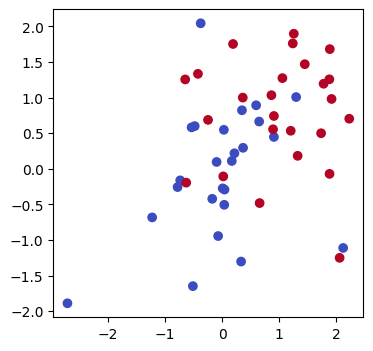

In [2]:
rng = np.random.default_rng (1)
X = rng.standard_normal ((50, 2))
y = np.array ([ -1]*25+[1]*25) #sets the first 25 to -1 and the next 25 to 1
print(y)
X[y==1] += 1
fig , ax = subplots(figsize =(4,4))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

They are not linearly separable. We now fit the classifier.

In [3]:
svm_linear = SVC(C=5, kernel='linear') #support vector classifier
svm_linear.fit(X, y)

SVC(C=5, kernel='linear')

The support vector classifier with two features can be visualized by plotting values of its decision function. We have included a function for this in the `ISLP` package.
 

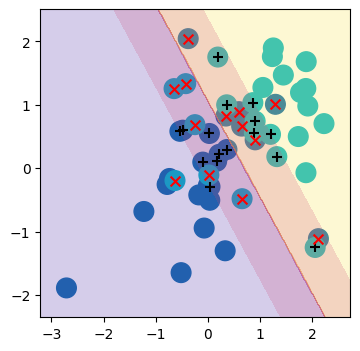

In [4]:
fig , ax = subplots(figsize =(4,4))
plot_svm(X, y, svm_linear, ax=ax)

The decision boundary between the two classes is linear (because we
used the argument `kernel='linear'`). The support vectors are marked with `+` and the remaining observations are plotted as circles. Red $\times$ indicate the observations fall on the wrong side (= are misclassified).

<font color='red'>Try out: What if we instead used a smaller value of the cost parameter `C`?</font>


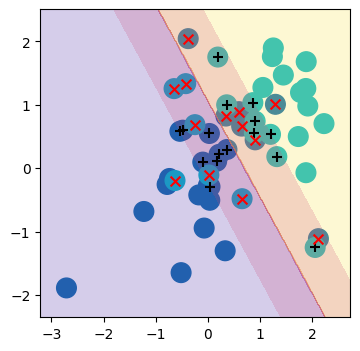

In [12]:
svm_linear = SVC(C=9, kernel='linear') #support vector classifier
svm_linear.fit(X, y)
fig , ax = subplots(figsize =(4,4))
plot_svm(X, y, svm_linear, ax=ax)

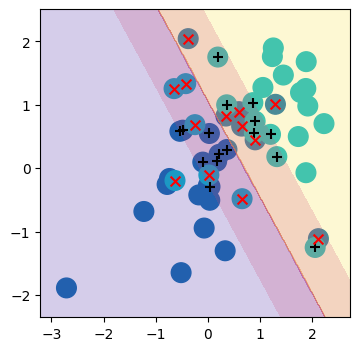

In [5]:
svm_linear_small = SVC(C=2, kernel='linear')
svm_linear_small.fit(X, y)
fig , ax = subplots(figsize =(4,4))
plot_svm(X, y, svm_linear_small, ax=ax)

With a smaller value of the cost parameter, we obtain a larger number of
support vectors, because the margin is now wider. For linear kernels, we
can extract the coefficients of the linear decision boundary as follows:

With a smaller value of the cost parameter CC, the SVM allows more misclassifications, resulting in a wider margin.

In [6]:
 svm_linear.coef_

array([[1.17303397, 0.77330906]])

Since the support vector machine is an estimator in `sklearn`, we can use the usual approach for tuning it:


In [7]:
kfold = skm.KFold(5,random_state =0,shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [8]:
# kfold = skm.KFold(5,random_state =0,shuffle=True)
# grid = skm.GridSearchCV(svm_linear, {'C':np.linspace(0,100,10)}, refit=True, cv=kfold, scoring='accuracy')
# grid.fit(X, y)
# grid.best_params_

We can easily access the cross-validation errors for each of these models in
`grid.cv_results_`. This prints out a lot of detail, so we extract the accuracy
results only.

In [9]:
 grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.72, 0.74, 0.74, 0.74, 0.74, 0.74])

We see that `C=1` results in the highest cross-validation accuracy of 0.74,
though the accuracy is the same for several values of `C`. The classifier
`grid.best_estimator_` can be used to predict the class label on a set of
test observations. Let's generate a test data set.

In [10]:
X_test = rng.standard_normal ((20, 2))
y_test = np.array ([-1]*10+[1]*10)
X_test[y_test ==1] += 1

Now we predict the class labels of these test observations. For the precitions, we use the best model selected by cross-validation.

In [11]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


Thus, with this value of `C`, 70% of the test observations are correctly classified. 



<font color='red'>Try out: What if we had instead used `C=0.001`?
What is then the rate of test observations correctly classified?
</font>




In [13]:
kfold = skm.KFold(5,random_state =0,shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 0.001}

In [14]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


With C = 0.001 we have a 60 % of accuracy

We now consider a situation in which the two classes are linearly separable. Then we can find an optimal separating hyperplane using the `SVC()` estimator. We first further separate the two classes in our simulated data
so that they are linearly separable:

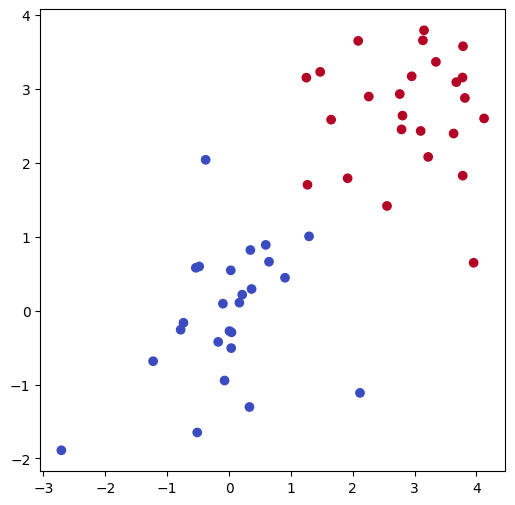

In [15]:
X[y==1] += 1.9;
fig , ax = subplots(figsize =(6,6))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

Now the observations are linearly separable.

In [16]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


We fit the support vector classifier and plot the resulting hyperplane, using
a very large value of `C` so that no observations are misclassified.

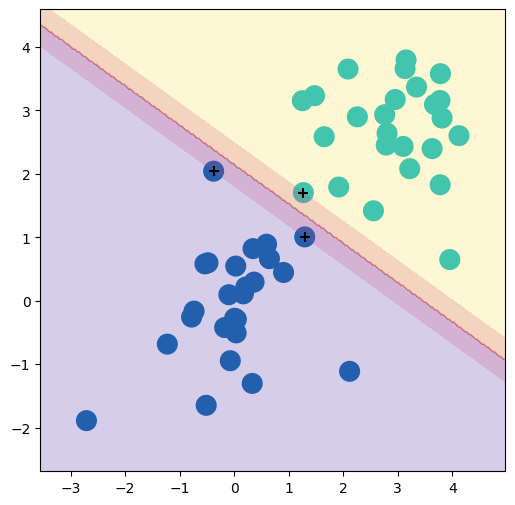

In [17]:
fig, ax = subplots(figsize =(6,6))
plot_svm(X, y, svm_, ax=ax)

Indeed no training errors were made and only two (other example was three, as we generate points randomly) support vectors were
used. In fact, the large value of `C` also means that these three support points are on the margin, and define it. One may wonder how good the classifier could be on test data that depends on only three data points! We now try a smaller value of `C`.

In [18]:
svm_ = SVC(C=1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


Using `C=0.1`, we again do not misclassify any training observations, but we
also obtain a much wider margin and make use of twelve support vectors.
These jointly define the orientation of the decision boundary, and since
there are more of them, it is more stable. It seems possible that this model
will perform better on test data than the model with `C=1e5` (and indeed, a
simple experiment with a large test set would bear this out).

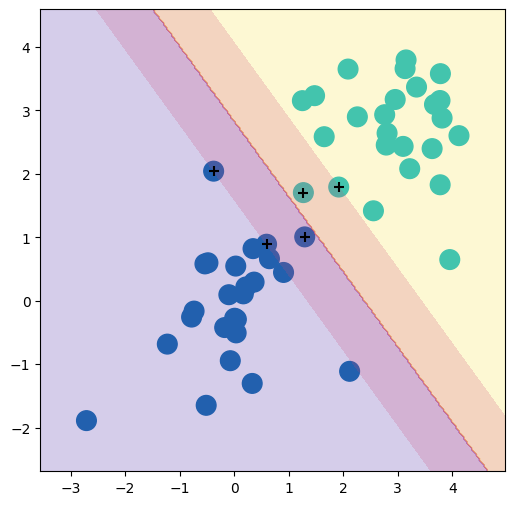

In [19]:
fig, ax = subplots(figsize =(6,6))
plot_svm(X, y, svm_, ax=ax)

## 2. Support Vector Machine with An Astronomical Example <a class="anchor" id="second-bullet"></a>

From `astroML`, we fetch a sample with RR Lyrae star colors and try to classify the stars with the SVC implementation from `sklearn.svm`.


**This code will take a while to run.**


In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from scipy import stats


# Ivezic v2, Figure 9.10, edits by GTR and SRT
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from sklearn.svm import SVC
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination
from matplotlib import colors

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()

print(X)
print(y)

/home/ruben/miniconda3/envs/tesis/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


[[ 1.2509995   0.39400005  0.13700008  0.06199932]
 [ 1.0480003   0.3390007   0.15199852  0.02300072]
 [ 1.0080013   0.34199905  0.12899971  0.20300102]
 ...
 [ 1.0440006   0.2119999   0.03499985  0.00200081]
 [ 1.0649986   0.17200089  0.04199982  0.00300026]
 [ 1.1259995   0.06500053 -0.0170002  -0.05799866]]
[0. 0. 0. ... 1. 1. 1.]


@pickle_results: using precomputed results from 'SVM_rrlyrae.pkl'
completeness [0.99270073 1.         1.         1.        ]
contamination [0.90014684 0.85347594 0.85347594 0.85471898]


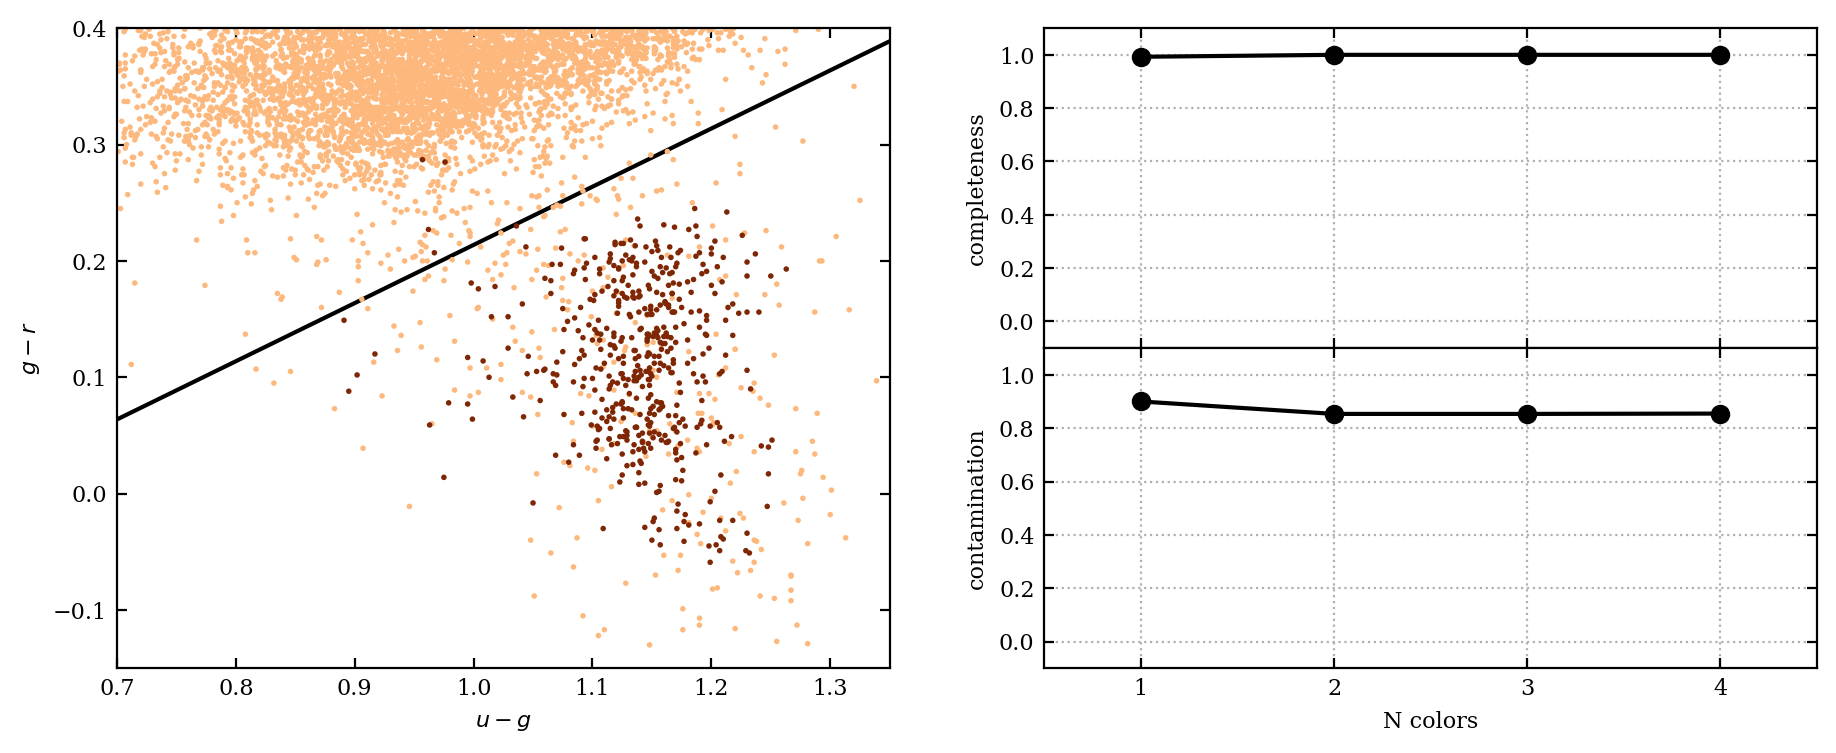

In [21]:

X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# SVM takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::5]
#y = y[::5]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# Fit SVM
Ncolors = np.arange(1, X.shape[1] + 1)


@pickle_results('SVM_rrlyrae.pkl')
def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='linear', class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
w = clf.coef_[0]
a = -w[0] / w[1]
yy = np.linspace(-0.1, 0.4)
xx = a * yy - clf.intercept_[0] / w[1]

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
ax.plot(xx, yy, '-k')
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

ax.set_xlim(0.7, 1.35)
ax.set_ylim(-0.15, 0.4)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()


<font color='red'>How do you interprete the results?</font>



The SVM classifier performs well using only one color, achieving 100% completeness. However, contamination is slightly higher with fewer features. As more colors (features) are added, the contamination rate decreases modestly, while completeness remains stable. This suggests that while one color may be sufficient to identify most RR Lyrae stars, using more color features helps reduce misclassifications and improves the model's reliability.

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
* seen how to use a Support Vector Classifier and interprete its result
* seen how to use a Support Vector Machine on an astronomical dataset.